In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Import dataset
df=pd.read_csv('imdb_top_1000.csv')

In [4]:
# Cleaning data
df["Gross"]=df["Gross"].replace(",", "", regex=True).astype(float)
df.dropna()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,https://m.media-amazon.com/images/M/MV5BYjRmY2...,Giù la testa,1971,PG,157 min,"Drama, War, Western",7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690.0
991,https://m.media-amazon.com/images/M/MV5BMzAyND...,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435.0
992,https://m.media-amazon.com/images/M/MV5BMjAwMT...,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612.0
994,https://m.media-amazon.com/images/M/MV5BZjQyMG...,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024.0


             IMDB_Rating  Meta_score  No_of_Votes     Gross
IMDB_Rating     1.000000    0.268531     0.494979  0.095923
Meta_score      0.268531    1.000000    -0.018507 -0.030587
No_of_Votes     0.494979   -0.018507     1.000000  0.574393
Gross           0.095923   -0.030587     0.574393  1.000000


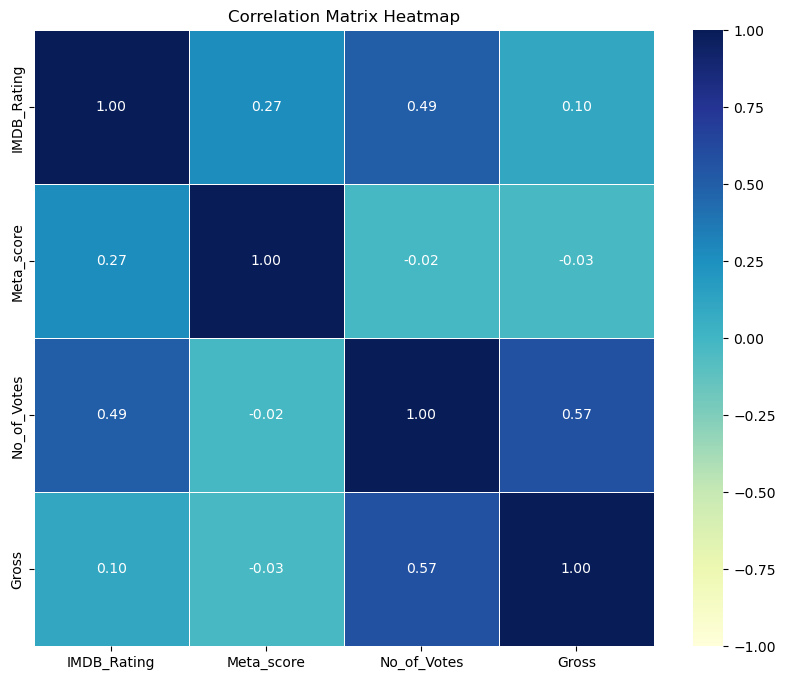

In [5]:
# Correlation matrix w/ numeric values only
numeric_df=df.select_dtypes(include=['number'])
correlation_matrix=numeric_df.corr()

print(correlation_matrix)

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Correlation Analysis:
The correlation matrix reveals the following relationships between `Gross` and other variables:

`IMDB_Rating` and `Gross`:
Correlation Coefficient: <strong>0.0959</strong> <br />
This is a very weak positive linear relationship. IMDb ratings have minimal influence on gross revenue.

`Meta_score` and `Gross`:
Correlation Coefficient: <strong>-0.0306</strong> <br />
This is an almost negligible relationship with a slight negative correlation. Meta scores have minimal impact on gross revenue.

`No_of_Votes` and `Gross`:
Correlation Coefficient: <strong>0.5744</strong> <br />
This is a moderately strong positive linear relationship. Higher numbers of votes are associated with higher gross revenue.

<h2>Visualizations:</h2>

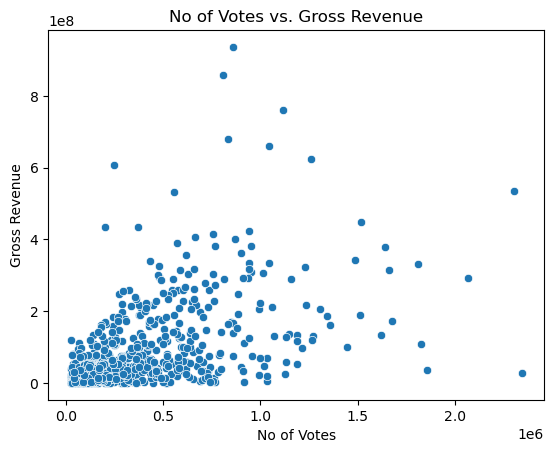

In [6]:
# Plotting Number of Votes vs. Gross
sns.scatterplot(x='No_of_Votes', y='Gross', data=df)
plt.title('No of Votes vs. Gross Revenue')
plt.xlabel('No of Votes')
plt.ylabel('Gross Revenue')
plt.show()

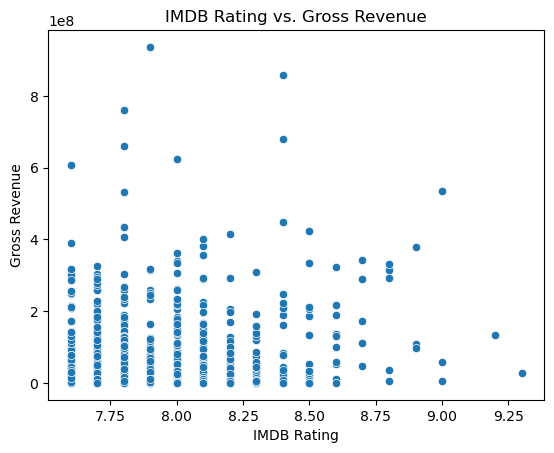

In [7]:
# Plotting IMDB Rating vs. Gross
sns.scatterplot(x='IMDB_Rating', y='Gross', data=df)
plt.title('IMDB Rating vs. Gross Revenue')
plt.xlabel('IMDB Rating')
plt.ylabel('Gross Revenue')
plt.show()

<h2>Feature Engineering: Log Transformations:</h2>

                 IMDB_Rating  Meta_score  Log_No_of_Votes  Log_Gross
IMDB_Rating         1.000000    0.268531         0.325238  -0.003570
Meta_score          0.268531    1.000000        -0.060017  -0.046115
Log_No_of_Votes     0.325238   -0.060017         1.000000   0.649416
Log_Gross          -0.003570   -0.046115         0.649416   1.000000


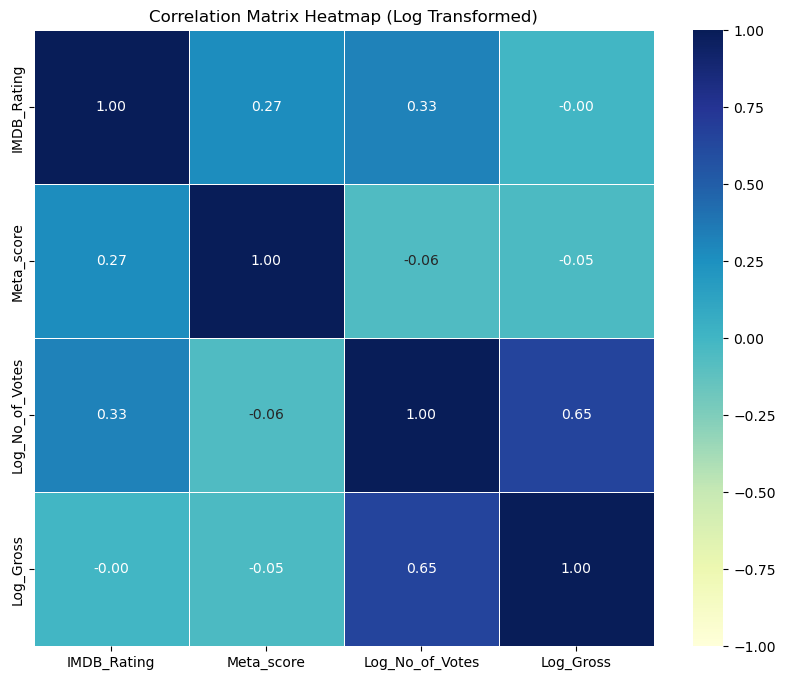

In [8]:
# Log transformation for skewed data
df['Log_Gross'] = np.log(df['Gross'] + 1)  # Adding 1 to avoid log(0)
df['Log_No_of_Votes'] = np.log(df['No_of_Votes'] + 1)

# Recalculate the correlation matrix with log-transformed features
numeric_df_log = df[['IMDB_Rating', 'Meta_score', 'Log_No_of_Votes', 'Log_Gross']].corr()
print(numeric_df_log)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df_log, annot=True, cmap='YlGnBu', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Heatmap (Log Transformed)')
plt.show()

<h2>Linear Regression Model:</h2>

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows with missing values
df_cleaned = df.dropna()

# Features and target
X = df_cleaned[['IMDB_Rating', 'Meta_score', 'Log_No_of_Votes']]
y = df_cleaned['Log_Gross']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 2.547510650016273
R-squared: 0.43656734244856576


<h2>Feature Importance Using Random Forest:</h2>

Mean Squared Error (RF): 2.9067352067438437
R-squared (RF): 0.35711768572055236


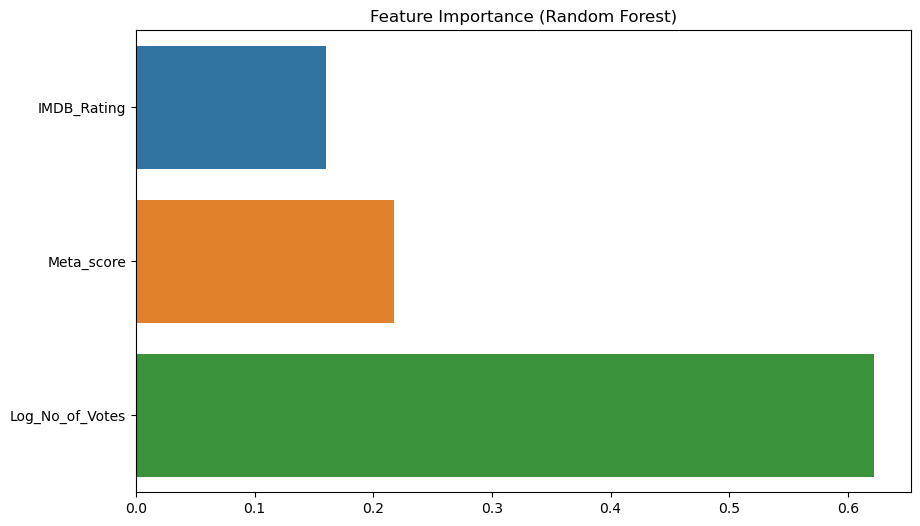

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluation
print("Mean Squared Error (RF):", mean_squared_error(y_test, rf_y_pred))
print("R-squared (RF):", r2_score(y_test, rf_y_pred))

# Feature importance
importances = rf_model.feature_importances_
features = X.columns

# Visualizing feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance (Random Forest)')
plt.show()


<h2>Cross-Validation and Hyperparameter Tuning</h2>

In [17]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predictions using the best model
best_rf_model = grid_search.best_estimator_
best_rf_y_pred = best_rf_model.predict(X_test)

# Evaluation
print("Best RF Mean Squared Error:", mean_squared_error(y_test, best_rf_y_pred))
print("Best RF R-squared:", r2_score(y_test, best_rf_y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best RF Mean Squared Error: 2.719833485538514
Best RF R-squared: 0.39845471937691157


<h2>Visualizing Predictions vs. Actual Values</h2>

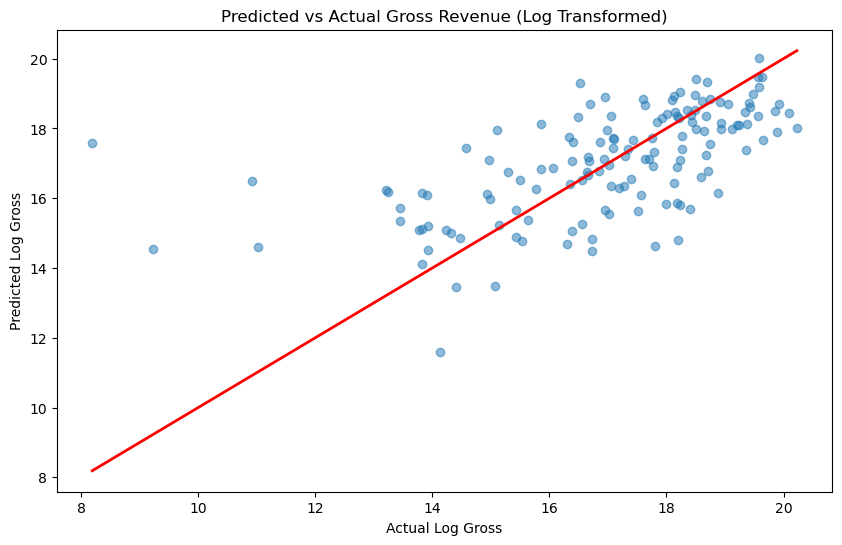

In [15]:
# Visualizing predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.5)
plt.title('Predicted vs Actual Gross Revenue (Log Transformed)')
plt.xlabel('Actual Log Gross')
plt.ylabel('Predicted Log Gross')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.show()

# Analysis of Movie Gross Prediction

## Correlation Matrix
The table below presents the correlation coefficients between the key variables in the dataset:

|                 | IMDB_Rating | Meta_score | Log_No_of_Votes | Log_Gross |
|-----------------|-------------|------------|-----------------|-----------|
| **IMDB_Rating**  | 1.000       | 0.269      | 0.325           | -0.004    |
| **Meta_score**   | 0.269       | 1.000      | -0.060          | -0.046    |
| **Log_No_of_Votes** | 0.325       | -0.060     | 1.000           | 0.649     |
| **Log_Gross**    | -0.004      | -0.046     | 0.649           | 1.000     |

### Key Insights:
- The highest correlation with `Log_Gross` is from `Log_No_of_Votes` (0.649), suggesting that the number of votes is the most predictive feature of gross revenue.
- `IMDB_Rating` and `Meta_score` have very weak correlations with `Log_Gross`, indicating they are not strong predictors of box office performance in this dataset.

## Linear Regression Results
A linear regression model was built using `IMDB_Rating`, `Meta_score`, and `Log_No_of_Votes` as predictors, and `Log_Gross` as the target variable. The results of the model are as follows:

- **Mean Squared Error (MSE)**: 2.5475
- **R-squared**: 0.437

These results suggest that the model explains approximately **43.7%** of the variance in `Log_Gross`, which indicates a moderate fit. However, the relatively high MSE suggests that the predictions could still be improved.

## Random Forest Results
To further improve the model, a Random Forest Regressor was used. The initial performance metrics of the Random Forest were as follows:

- **Mean Squared Error (RF)**: 2.9067
- **R-squared (RF)**: 0.357

After tuning the hyperparameters (e.g., number of trees, maximum depth, minimum samples per leaf and split), the best Random Forest model achieved:

- **Best MSE (RF)**: 2.7198
- **Best R-squared (RF)**: 0.398

Although the Random Forest model's performance was improved after tuning, it did not outperform the linear regression model in this case. This suggests that the relationship between the variables might be more linear than complex, making linear regression a suitable approach for this dataset.

## Conclusion
The number of votes (`Log_No_of_Votes`) is the strongest predictor of a movie's gross revenue, as indicated by its high correlation and its influence in both linear regression and Random Forest models. The performance of the models indicates that while predictions can be moderately accurate, further feature engineering or the inclusion of additional variables may enhance predictive power.